## Problem 3: Advanced Analysis
We have provided annotations over a larger portion of data from the same dataset (aggregate.csv). This dataset includes annotator ratings for Tone, Expertise, EncouragingDiscouraging, RespectfulDisrespectful, as well as the actual gender of the TED talk speaker.
Using these annotations, conduct an analysis that contrasts traits of comments addressed towards female and male speakers. You may analyze any one of the annotation traits (i.e. Respect), but justify your choice of trait.


In [245]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

#sns.set_style("whitegrid")
#sns.color_palette("Set2")



In [246]:
agg = pd.read_csv("data/aggregate.csv")

agg.head()

,EncouragingDiscouraging,ExpertiseScale,PosterTone,RespectfulDisrespectful,gender,speakerhidden,talkid
0,Discouraging,None-STEM degree,Negative,Neutral,male,"<br>for those who are interested, penn &amp; t...",1829
1,Discouraging,No degree,None,Neutral,male,one time i saw a parrent yelling to his child ...,1917
2,Encouraging,STEM degree,Neutral,Neutral,female,"<br><span class=""highlighted"" data-timestamp=""...",1238
3,Encouraging,None-STEM degree,Positive,Respectful,male,beyond the tremendous positive change this may...,525
4,Encouraging,STEM degree,None,Neutral,male,"his notion that the ""media is the message"" mak...",1370


### Male vs female counts in data

There are 681 female speakers vs 722 male speakers in the data. 

In [247]:
# finding count of female vs male speakers in the data 

f_count = sum(agg['gender'] == 'female')
m_count = sum(agg['gender'] == 'male')

print(f'There are {f_count} female and {m_count} male speakers in the data')

There are 681 female and 722 male speakers in the data


<Axes: xlabel='gender', ylabel='Count'>

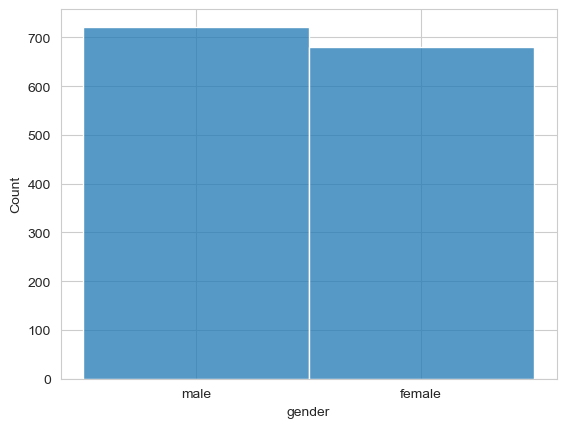

In [248]:
#fig = px.histogram(agg, x = 'gender')
#fig.show()

sns.histplot(data = agg, x = 'gender')

### Respectful/disresepectful colored by gender

Across all speakers, the dominant category of respectfulness is 'Respectful', followed closely by 'Neutral' and distantly by 'Disrespectful'. It can be noted that more female speakers were given respectful comments than male speakers, while more male speakers were given disrespectful comments than female speakers, and neutral commments seem pretty evenly distributed among female and male speakers. 

[Text(0.5, 1.0, 'Respectfulness level colored by gender')]

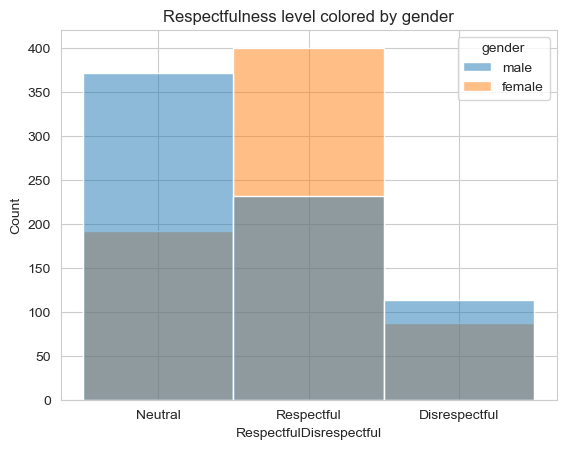

In [275]:
#fig = px.histogram(agg, x = 'RespectfulDisrespectful', color = 'gender')
#fig.show()

sns.histplot(agg, x = "RespectfulDisrespectful", hue = "gender").set(title = "Respectfulness level colored by gender")


### Female Speakers

The dominant category of respect among female speakers is 'respectful' (400 comments), followed by 'neutral' (192 comments), and 'disrespectful' (87 comments) trailing far behind. 

In [250]:
f_df = agg.query('gender == "female"')
f_respectful_df = agg.query('gender == "female" and RespectfulDisrespectful == "Respectful"')
f_neutral_df = agg.query('gender == "female" and RespectfulDisrespectful == "Neutral"')
f_disrespectful_df = agg.query('gender == "female" and RespectfulDisrespectful == "Disrespectful"')


m_df = agg.query('gender == "male"')
m_respectful_df = agg.query('gender == "male" and RespectfulDisrespectful == "Respectful"')
m_neutral_df = agg.query('gender == "male" and RespectfulDisrespectful == "Neutral"')
m_disrespectful_df = agg.query('gender == "male" and RespectfulDisrespectful == "Disrespectful"')


Text(0.5, 1.0, 'Distribution of respectfulness among female speakers')

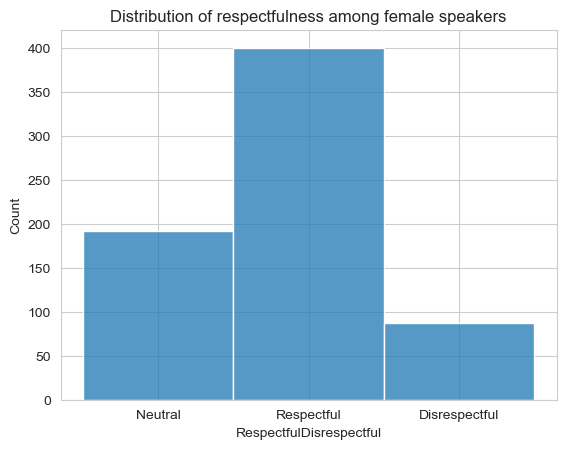

In [257]:
sns.histplot(f_df, x = 'RespectfulDisrespectful').set_title('Distribution of respectfulness among female speakers')


#### Male Speakers

Among male speakers, the dominant category of respect is 'neutral' (372 comments), followed by 'respectful' (232 comments), and 'disrespectful' (113 comments). 

In [274]:
sum(m_df['RespectfulDisrespectful'] == 'Disrespectful')

113

Text(0.5, 1.0, 'Distribution of respectfulness among male speakers')

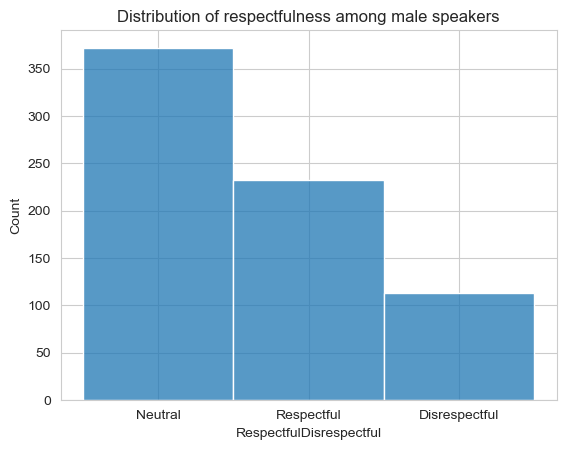

In [258]:
sns.histplot(m_df, x = 'RespectfulDisrespectful').set_title('Distribution of respectfulness among male speakers')

### Expertise colored by gender

In [152]:
fig = px.histogram(agg, x = 'ExpertiseScale', color = 'gender')
fig.show()

#sns.histplot(data = agg, x = 'ExpertiseScale', hue = 'gender')

### Tone colored by gender

In [153]:
fig = px.histogram(agg, x = 'PosterTone', color = 'gender')
fig.show()

### Encouraging/Discouraging colored by gender


In [120]:
fig = px.histogram(agg, x = 'EncouragingDiscouraging', color = 'gender')
fig.show()